# Table widgets in the napari viewer
Before we talk about tables and widgets in napari, let's create a viewer, a simple test image and a labels layer:

In [1]:
import numpy as np
import napari
import pandas
from napari_skimage_regionprops import regionprops_table, add_table, get_table

In [2]:
viewer = napari.Viewer()

Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.


In [3]:
viewer.add_image(np.asarray([[1,2],[2,2]]))
viewer.add_labels(np.asarray([[1,2],[3,3]]))

<Labels layer 'Labels' at 0x25c81eca790>

Now, let's perform a measurement of `size` and `intensity` of the labeled objects in the given image. A table with results will be automatically added to the viewer

In [4]:
regionprops_table(
    viewer.layers[0].data,
    viewer.layers[1].data,
    size=True,
    intensity=True,
    napari_viewer=viewer,
)

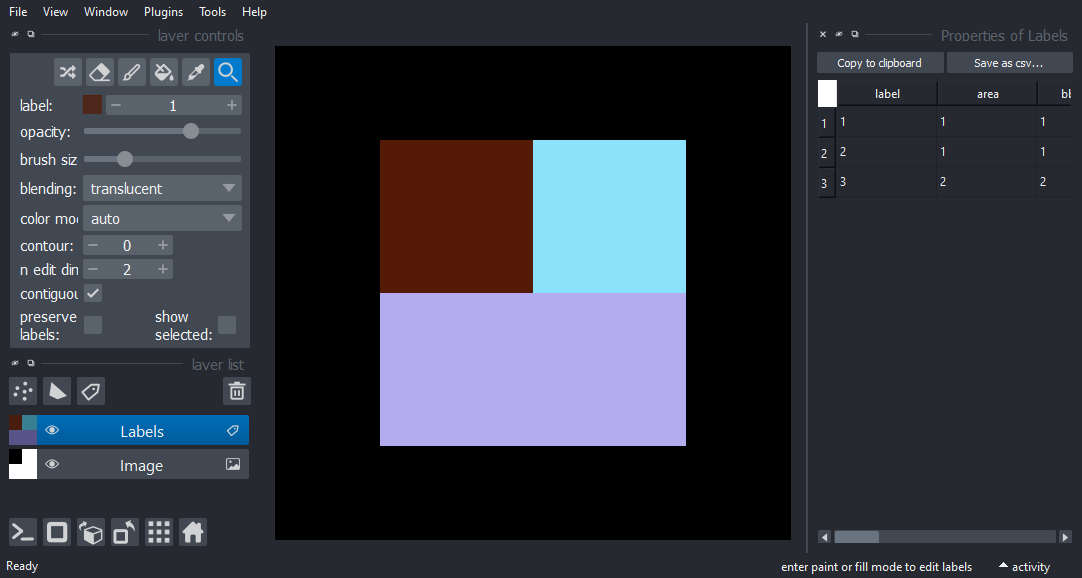

In [5]:
napari.utils.nbscreenshot(viewer)

We can also get the widget representing the table:

In [6]:
# The table is associated with a given labels layer:
labels = viewer.layers[1]

table = get_table(labels, viewer)
table

You can also read the content from the table as a dictionary. It is recommended to convert it into a pandas `DataFrame`:

In [7]:
content = pandas.DataFrame(table.get_content())
content

,label,area,bbox_area,convex_area,equivalent_diameter,max_intensity,mean_intensity,min_intensity,standard_deviation_intensity,index
0,1,1,1,1,1.128379,1.0,1.0,1.0,0.0,1
1,2,1,1,1,1.128379,2.0,2.0,2.0,0.0,2
2,3,2,2,2,1.595769,2.0,2.0,2.0,0.0,3


The content of this table can be changed programmatically. This also changes the `properties` of the associated layer.

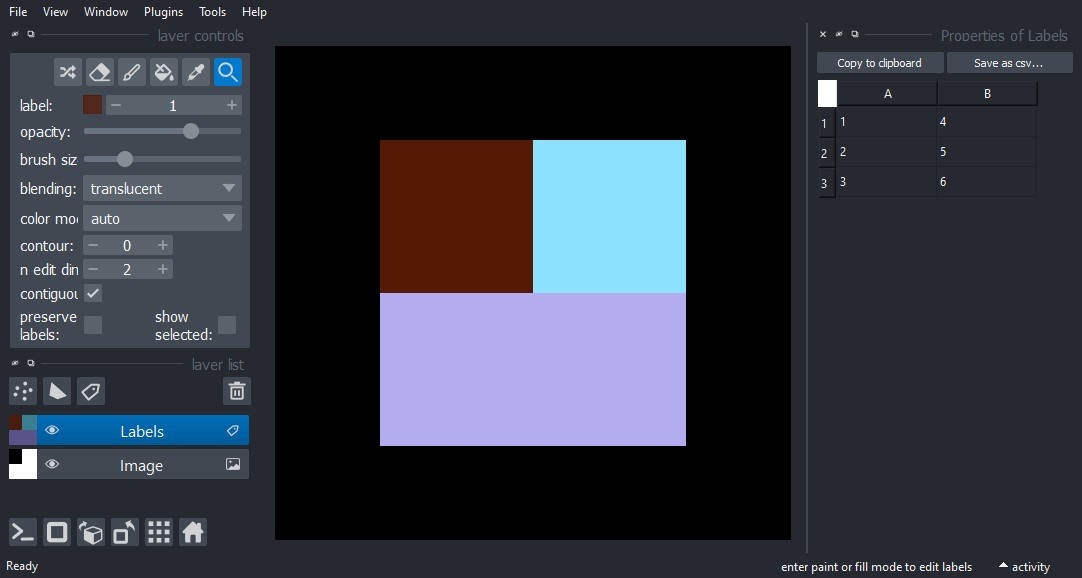

In [8]:
new_values = {'A': [1, 2, 3],
             'B': [4, 5, 6]
             }
table.set_content(new_values)
napari.utils.nbscreenshot(viewer)

You can also append data to an existing table through the `append_content()` function: Suppose you have another measurement for the labels in your image, i.e. the "double area":

In [9]:
table.set_content(content.to_dict('list'))
double_area = {'label': content['label'].to_numpy(),
               'Double area': content['area'].to_numpy() * 2.0}

You can now append this as a new column to the existing table:

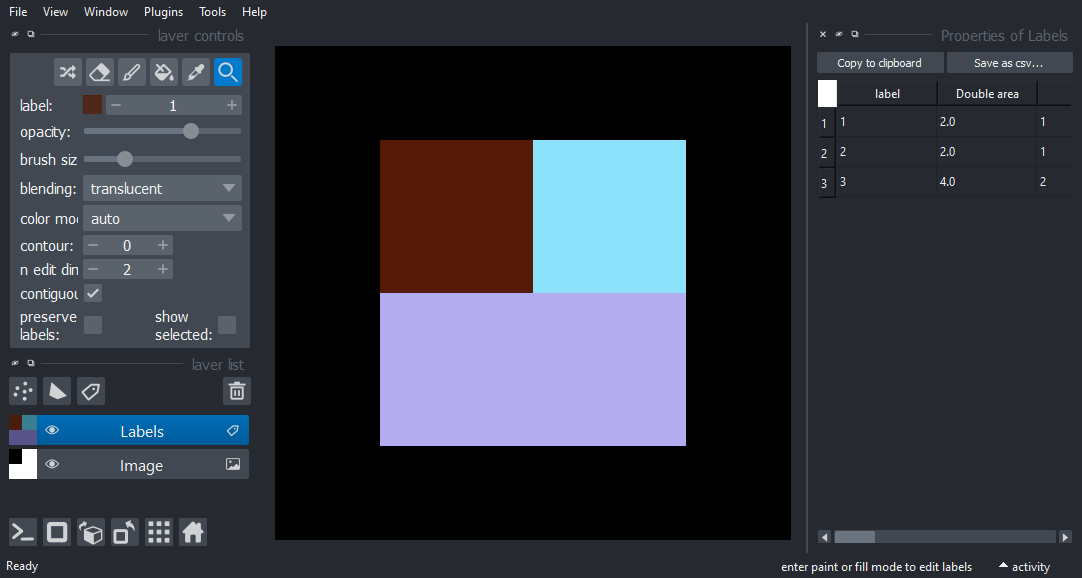

In [10]:
table.append_content(double_area)
napari.utils.nbscreenshot(viewer)

*Note*: If the added data has columns in common withh the exisiting table (for instance, the labels columns), the tables will be merged on the commonly available columns. If no common columns exist, the data will simply be added to the table and the non-intersecting row/columns will be filled with NaN:

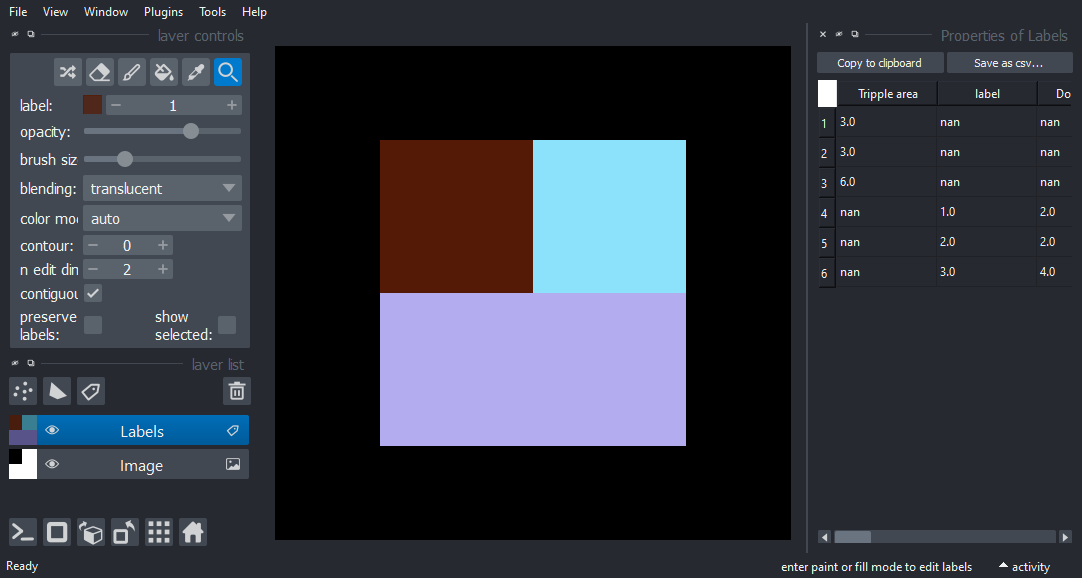

In [11]:
tripple_area = {'Tripple area': content['area'].to_numpy() * 3.0}
table.append_content(tripple_area)
napari.utils.nbscreenshot(viewer)

Note: Changing the label's `properties` does not invoke changes of the table...

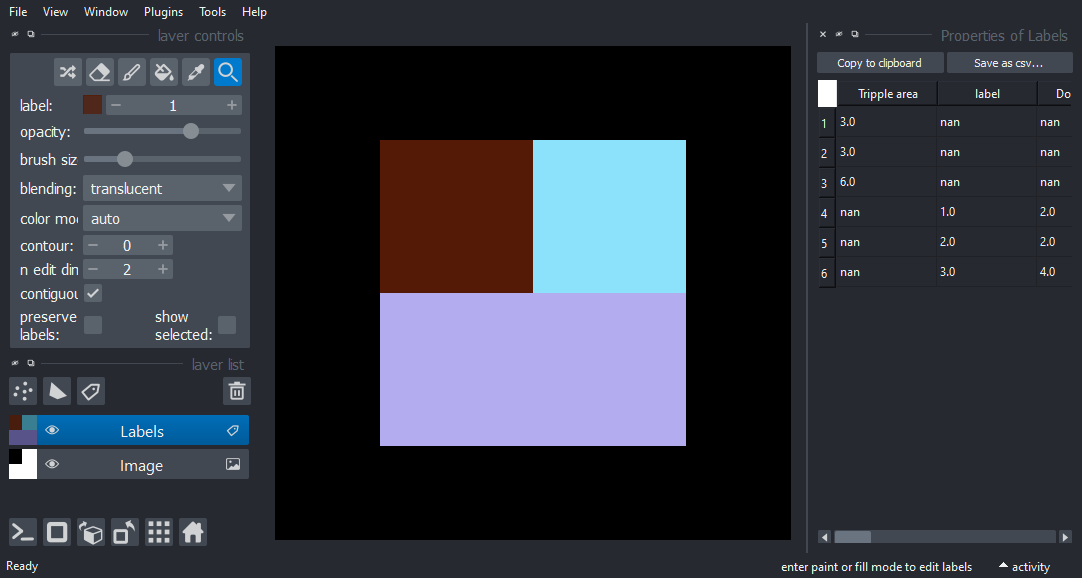

In [12]:
new_values = {'C': [6, 7, 8],
             'D': [9, 10, 11]
             }

labels.properties = new_values
napari.utils.nbscreenshot(viewer)

But you can refresh the content:

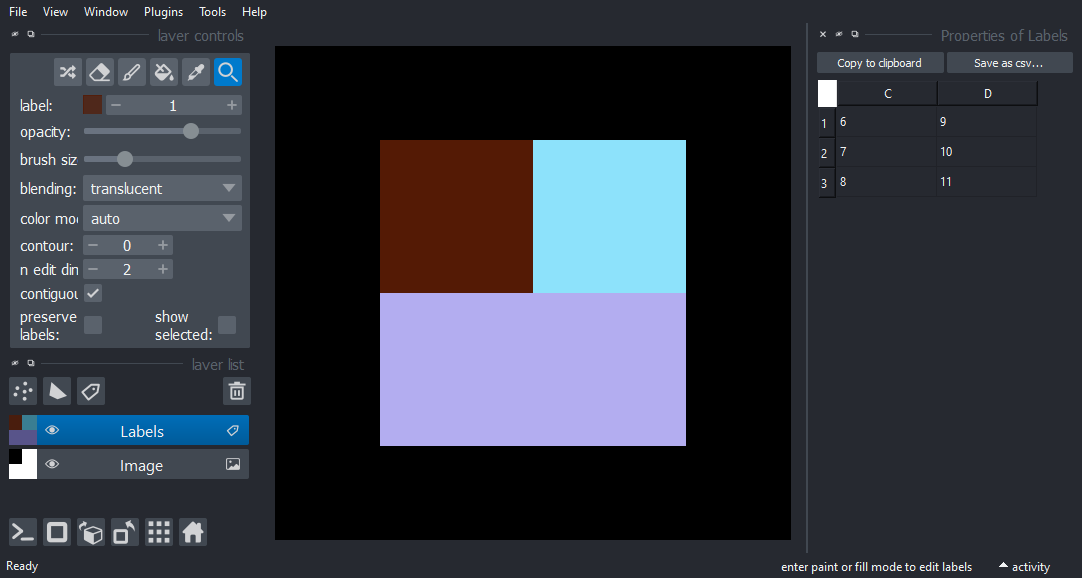

In [13]:
table.update_content()
napari.utils.nbscreenshot(viewer)

You can remove the table from the viewer like this:

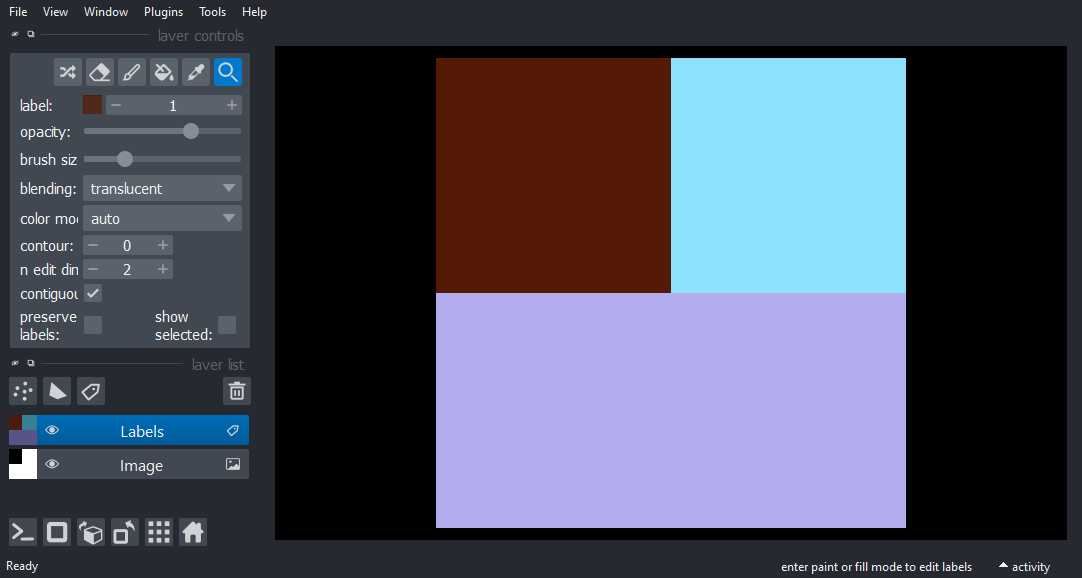

In [14]:
viewer.window.remove_dock_widget(table)
napari.utils.nbscreenshot(viewer)

Afterwards, the `get_table` method will return None:

In [15]:
get_table(labels, viewer)

To add the table again, just call `add_table` again. Note that the content of the properties of the labels have not been changed.

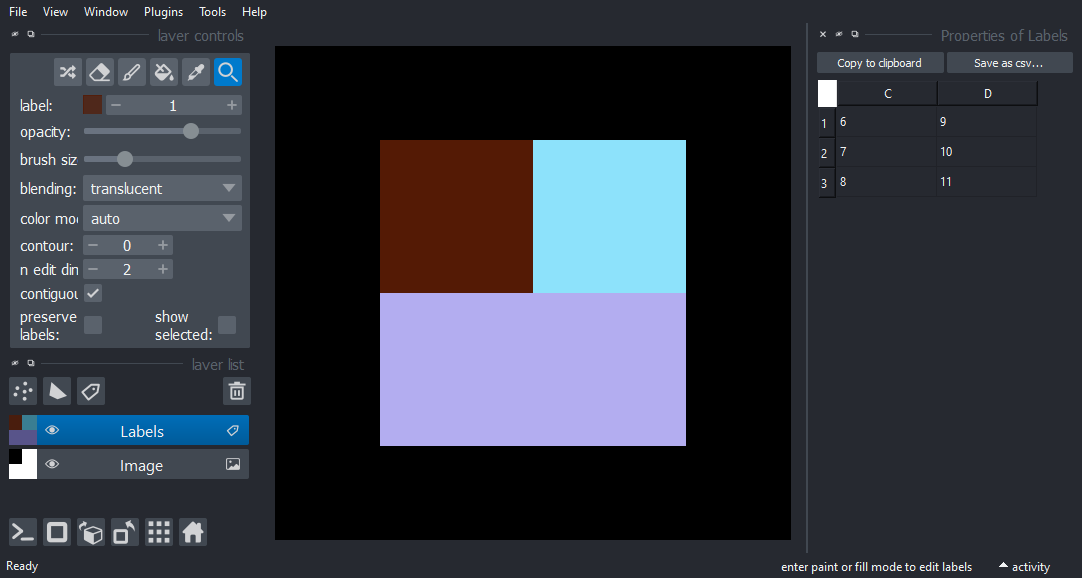

In [16]:
add_table(labels, viewer)
napari.utils.nbscreenshot(viewer)